In [71]:
import pyreadr
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### Cargo los datos de energía de cps getafe

In [51]:
df = pyreadr.read_r('./Datos_v5.RData')[None]

df['Fecha'] = pd.to_datetime(df['Fecha'])

#  Agrupo por horas y hago media. elimino dias sin todas sus horas.
df['Fecha'] = df['Fecha'].dt.floor('H')
df = df.groupby('Fecha', as_index=False).mean()
# elimino dias con horas sin muestras
df['day'] = df['Fecha'].dt.floor('D')


def fun(df):
    if len(df)==24:
        return df


df = df.groupby('day', as_index=False).apply(fun)
df = df.drop(['day'], axis=1)
df.index = pd.DatetimeIndex(df['Fecha'])
df = df.drop(['Fecha'], axis=1)


# Elimino dias 11 y 12 de agosto donde hay datos de consumo total anómalos
delete_index = pd.date_range('2022-08-11 00:00:00', '2022-08-12 23:00:00', freq='H')
df = df.drop(index=delete_index)

# Dejo solo la Potencia total
df = df[["Potencia_activa_total"]]

C:\Users\inaki\AppData\Local\Temp\ipykernel_16056\1034284931.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Fecha', as_index=False).mean()


#### Sacamos semanas completas, "DATOS_HORARIOS"

In [59]:
def get_weeks(df):
    dates = df.index
    monday_index = [x.weekday()==0 for x in df.index.normalize().unique()]
    mondays = dates.normalize().unique()[monday_index]
    all_weeks = []
    
    for date in mondays:
        start = date
        end = date + pd.Timedelta(days=6, hours=23)  # calculamos la fecha de fin de la secuencia

        if all(pd.date_range(start, end, freq='H').isin(dates)):  # verificamos si existe una secuencia completa de longitud len_seq
            week = pd.date_range(start, end, freq='H')
            all_weeks.append(df.loc[week].to_numpy())
                
    return np.array(all_weeks)

In [76]:
datos_horarios = get_weeks(df).squeeze()

In [77]:
datos_horarios.shape

(19, 168)

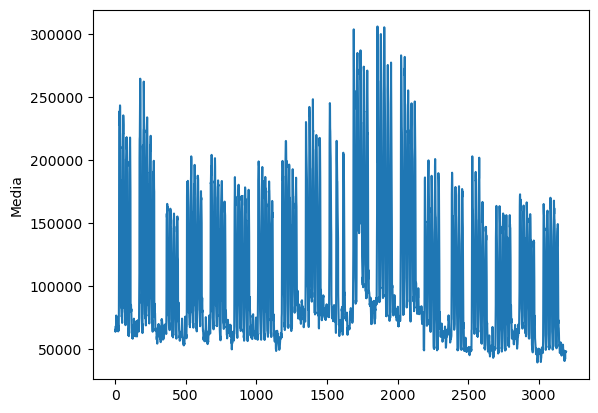

In [79]:
plt.plot(datos_horarios.reshape(-1))
plt.ylabel('Media')
plt.show()

#### Hacemos la media de cada hora de la semana para sacar "PERFIL DE REFERENCIA"

In [72]:
perfil_de_referencia = np.mean(datos_horarios, axis=0)

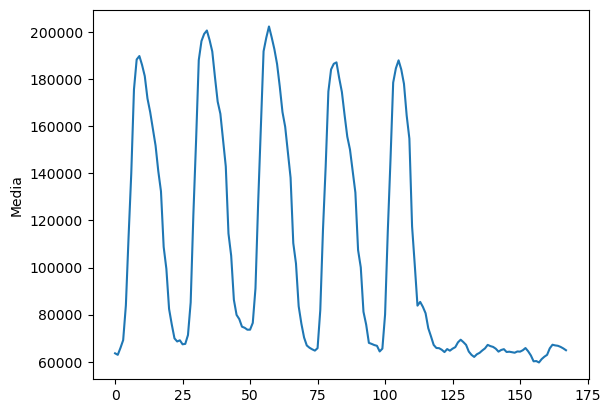

In [74]:
plt.plot(perfil_de_referencia)
plt.ylabel('Media')
plt.show()

## Parámetros de caracterización

In [106]:
# Consumo medio diario máximo
tmp = perfil_de_referencia.reshape(-1,24)
consumo_medio_diario_maximo = np.max(np.mean(tmp, axis=1))
print(f"consumo_medio_diario_maximo: {consumo_medio_diario_maximo}")

# Consumo horario medio
consumo_horario_medio = np.mean(perfil_de_referencia)
print(f"consumo_horario_medio: {consumo_horario_medio}")

# Consumo horario máximo
consumo_horario_maximo = np.max(perfil_de_referencia)
print(f"consumo_horario_maximo: {consumo_horario_maximo}")

# Consumo horario mínimo
consumo_horario_minimo = np.min(perfil_de_referencia)
print(f"consumo_horario_minimo: {consumo_horario_minimo}")

consumo_medio_diario_maximo: 131734.35817366166
consumo_horario_medio: 106911.22965038611
consumo_horario_maximo: 202346.54607459833
consumo_horario_minimo: 59693.36216373453


In [111]:
######
niveles_de_potencia = np.mean(tmp, axis=1) / consumo_medio_diario_maximo

# Niveles de potencia lunes
nivel_de_potencia_lunes = niveles_de_potencia[0]
print(f"nivel_de_potencia_lunes: {nivel_de_potencia_lunes:.2f}")

# Niveles de potencia martes
nivel_de_potencia_martes = niveles_de_potencia[1]
print(f"nivel_de_potencia_martes: {nivel_de_potencia_martes:.2f}")

# Niveles de potencia miércoles
nivel_de_potencia_miercoles = niveles_de_potencia[2]
print(f"nivel_de_potencia_miercoles: {nivel_de_potencia_miercoles:.2f}")

# Niveles de potencia jueves
nivel_de_potencia_jueves = niveles_de_potencia[3]
print(f"nivel_de_potencia_jueves: {nivel_de_potencia_jueves:.2f}")

# Niveles de potencia viernes
nivel_de_potencia_viernes = niveles_de_potencia[4]
print(f"nivel_de_potencia_viernes: {nivel_de_potencia_viernes:.2f}")

# Niveles de potencia sabado
nivel_de_potencia_sabado = niveles_de_potencia[5]
print(f"nivel_de_potencia_sabado: {nivel_de_potencia_sabado:.2f}")

# Niveles de potencia domingo
nivel_de_potencia_domingo = niveles_de_potencia[6]
print(f"nivel_de_potencia_domingo: {nivel_de_potencia_domingo:.2f}")


nivel_de_potencia_lunes: 0.93
nivel_de_potencia_martes: 1.00
nivel_de_potencia_miercoles: 0.99
nivel_de_potencia_jueves: 0.93
nivel_de_potencia_viernes: 0.84
nivel_de_potencia_sabado: 0.50
nivel_de_potencia_domingo: 0.49


In [116]:
#########
media_por_dia = np.mean(tmp, axis=1)

# Desviación de potencia lunes
desciavion_potencia_lunes = np.mean(np.abs(tmp[0] - media_por_dia[0]))
print(f"desciavion_potencia_lunes: {desciavion_potencia_lunes}")

# Desviación de potencia martes
desciavion_potencia_martes = np.mean(np.abs(tmp[1] - media_por_dia[1]))
print(f"desciavion_potencia_martes: {desciavion_potencia_martes}")

# Desviación de potencia miércoles
desciavion_potencia_miércoles = np.mean(np.abs(tmp[2] - media_por_dia[2]))
print(f"desciavion_potencia_miércoles: {desciavion_potencia_miércoles}")

# Desviación de potencia jueves
desciavion_potencia_jueves = np.mean(np.abs(tmp[3] - media_por_dia[3]))
print(f"desciavion_potencia_jueves: {desciavion_potencia_jueves}")

# Desviación de potencia viernes
desciavion_potencia_viernes = np.mean(np.abs(tmp[4] - media_por_dia[4]))
print(f"desciavion_potencia_viernes: {desciavion_potencia_viernes}")

# Desviación de potencia sabado
desciavion_potencia_sabado = np.mean(np.abs(tmp[5] - media_por_dia[5]))
print(f"desciavion_potencia_sabado: {desciavion_potencia_sabado}")

# Desviación de potencia domingo
desciavion_potencia_domingo = np.mean(np.abs(tmp[6] - media_por_dia[6]))
print(f"desciavion_potencia_domingo: {desciavion_potencia_domingo}")


desciavion_potencia_lunes: 42475.069466902256
desciavion_potencia_martes: 46584.414238990954
desciavion_potencia_miércoles: 45465.12912975706
desciavion_potencia_jueves: 42248.05941373211
desciavion_potencia_viernes: 41628.36033205229
desciavion_potencia_sabado: 1345.516221766107
desciavion_potencia_domingo: 1650.840434926254


In [81]:


#########

# Similitud de perfil de consumo los lunes

# Similitud de perfil de consumo los martes

# Similitud de perfil de consumo los miercoles

# Similitud de perfil de consumo los jueves

# Similitud de perfil de consumo los viernes

# Similitud de perfil de consumo los sabado

# Similitud de perfil de consumo los domingo

#########

# Consumo medio de trabajo

# Consumo medio de standby

#########

# Repetitividad Total

# Repetitividad laboral

# Repetitividad Fin de Semana

#########

# Puntos de ruptura A y B

# Puntos de ruptura comunes

# Numero de puntos laborales

# Número de puntos no laborales

########

# Perfil de consumo lunes

# Perfil de consumo martes

# Perfil de consumo miercoles

# Perfil de consumo jueves

# Perfil de consumo viernes

# Perfil de consumo sabado

# Perfil de consumo domingo


C:\Users\inaki\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: operands could not be broadcast together with shapes (23,1) (0,1) 